# Libraries

In [76]:
import os
import json
import numpy as np
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from my_draw_networkx_edge_labels import my_draw_networkx_edge_labels



# Setup

In [78]:
log_folder = "2024-05-13--18-51-58__sim_1"
#log_folder = "2024-05-08--09-15-23"
#log_folder = "2024-05-13--14-04-21"
log_folder_path = os.path.join("../logs", log_folder)
charts_folder_path = os.path.join(log_folder_path, "charts")
os.makedirs(charts_folder_path)
json_file_path = os.path.join("../logs", log_folder, "snowartz_metrics.json")
with open(json_file_path, 'r') as file:
    experiment_data = json.load(file)

json_custom_indicators_file_path = os.path.join("../logs", log_folder, "custom_indicators.json")
with open(json_custom_indicators_file_path, 'r') as file:
    custom_indicators = json.load(file)

# Charts

## Updated Frequency Map

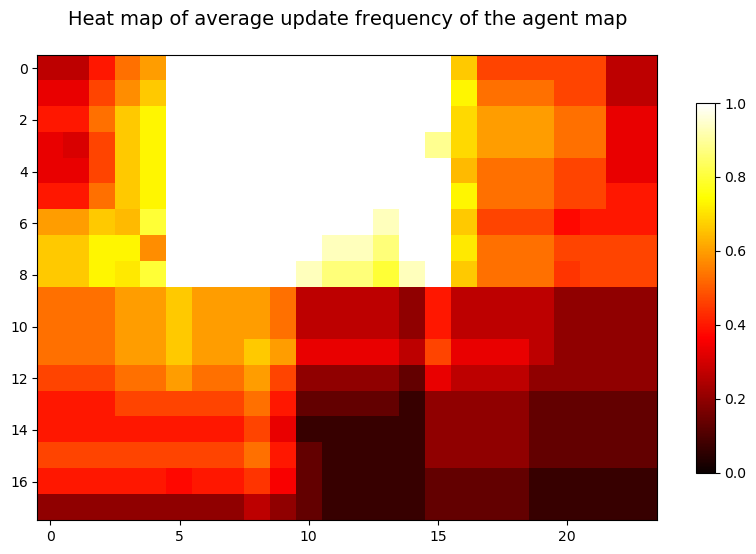

In [79]:

updated_frequency_map = experiment_data["updated_frequency_map"]
agents = updated_frequency_map.keys() # Nombres de los agentes

# Normalizar las matrices de cada agente
normalized_matrices = []
for agent in agents:
    max_value = np.max(updated_frequency_map[agent])
    normalized_matrix = updated_frequency_map[agent] / np.int64(len(experiment_data["react_per_round"][agent]))
    normalized_matrices.append(normalized_matrix)

# Calcular el promedio de las matrices normalizadas
average_matrix = np.mean(normalized_matrices, axis=0)

# Crear el mapa de calor del promedio
plt.figure(figsize=(10, 8))
plt.imshow(average_matrix, cmap='hot', interpolation='nearest', vmin=0, vmax=1)
plt.colorbar(shrink=0.6)
plt.title(f'Heat map of average update frequency of the agent map\n', fontsize=14)
plt.savefig(f'{charts_folder_path}/update_map_heat_map.png', dpi=300)
plt.show()

## Apple Consumption Based on Remaining Apples on Tree

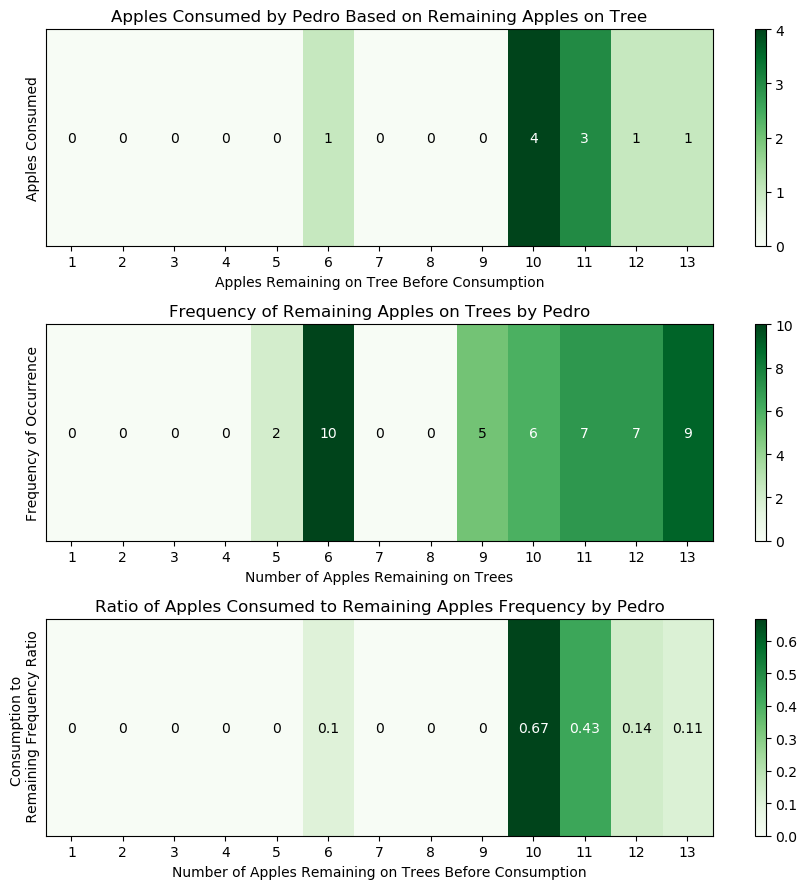

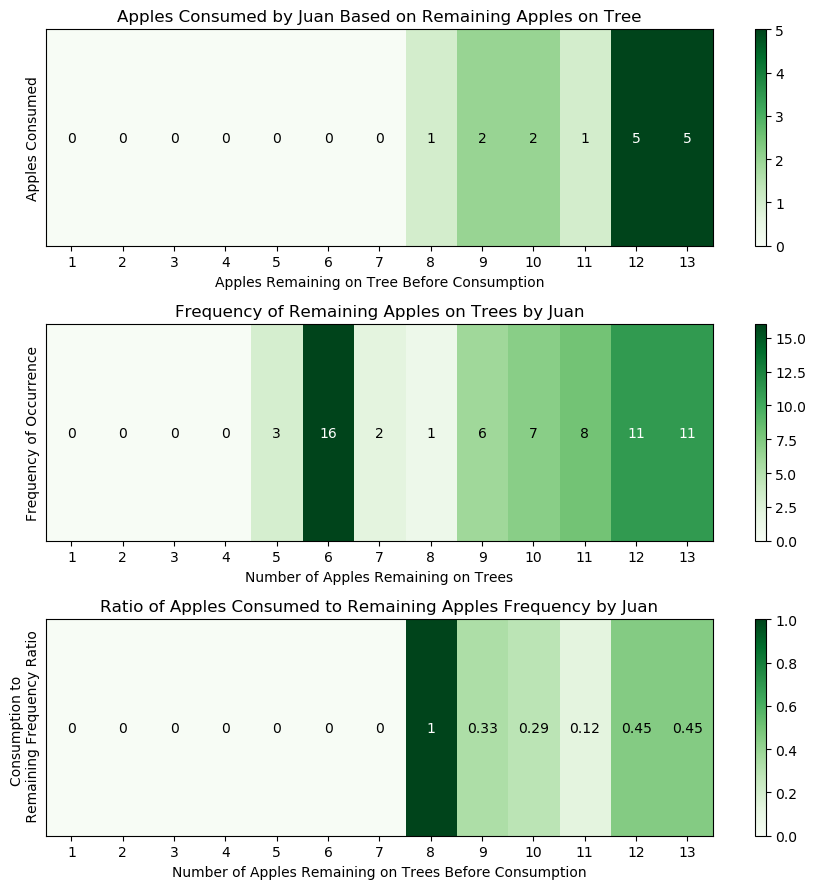

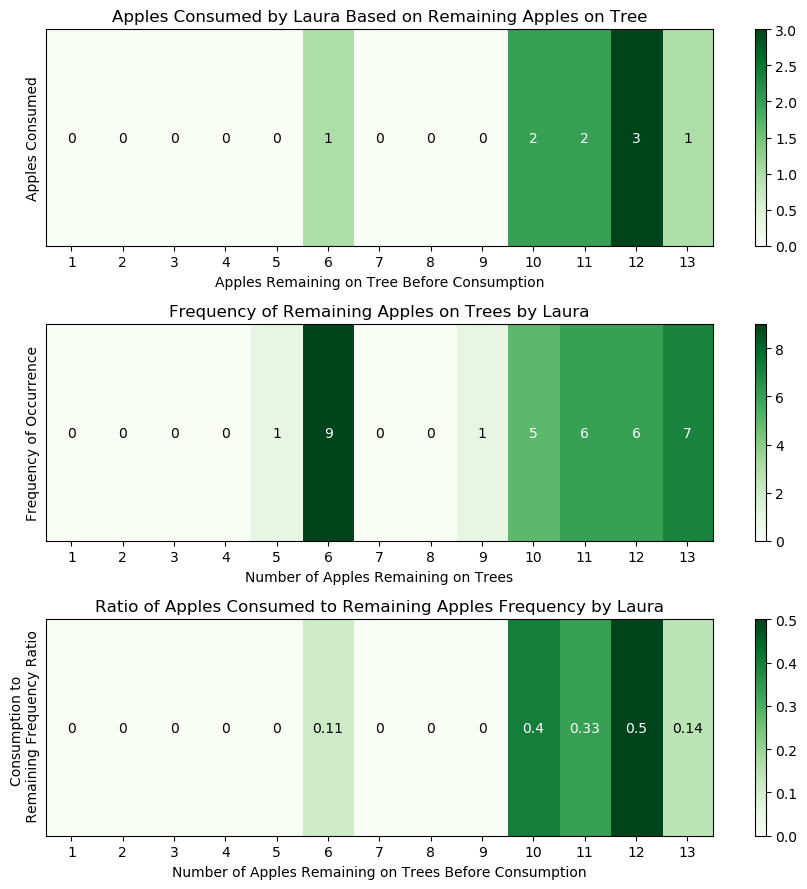

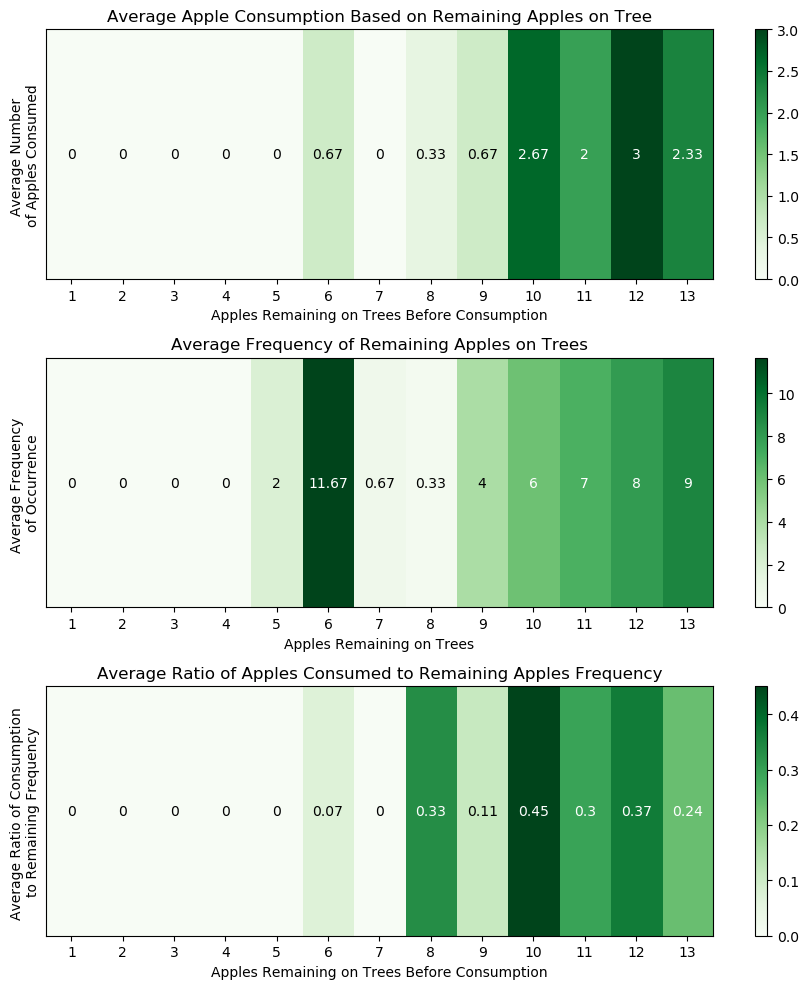

In [80]:
apple_consumption_per_remaining = experiment_data["apple_consumption_per_remaining"]
remaining_total = experiment_data["remaining_total"]

def calculate_ratios(apples, totals):
    apples = np.array(apples, dtype=float)
    totals = np.array(totals, dtype=float)
    totals_copy = totals.copy()
    totals_copy[totals_copy == 0] = 1  # Evitar división por cero
    ratio = apples / totals_copy
    return np.nan_to_num(ratio), np.nan_to_num(totals)  # Limpia NaN

def plot_heatmap(data, title, xlabel, ylabel, ax):
    data = np.array(data, dtype=float)
    im = ax.imshow(data.reshape(1, -1), cmap='Greens', aspect='auto', vmin=0, vmax=np.max(data))
    plt.colorbar(im, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(data)))
    ax.set_xticklabels(np.arange(1, len(data) + 1))
    ax.set_yticks([])
    for i, val in enumerate(data):
        if val == int(val):
            val = int(val)
        ax.text(i, 0, round(val, 2), ha='center', va='center', color='white' if val > np.max(data)/2 else 'black')

# Listas para acumular los datos de todos los agentes
all_apple_consumption = []
all_remaining_totals = []
all_ratios = []

# Procesar cada agente
for idx, agent in enumerate(agents):
    fig, axs = plt.subplots(3, 1, figsize=(9, 9))  # Subplots para cada agente en figuras separadas
    apple_consumption = apple_consumption_per_remaining[agent]
    remaining = remaining_total[agent]
    ratio, total = calculate_ratios(apple_consumption, remaining)
    all_apple_consumption.append(apple_consumption)
    all_remaining_totals.append(total)
    all_ratios.append(ratio)
    plot_heatmap(apple_consumption, f"Apples Consumed by {agent} Based on Remaining Apples on Tree", "Apples Remaining on Tree Before Consumption", "Apples Consumed", axs[0])
    plot_heatmap(total, f"Frequency of Remaining Apples on Trees by {agent}", "Number of Apples Remaining on Trees", "Frequency of Occurrence", axs[1])
    plot_heatmap(ratio, f"Ratio of Apples Consumed to Remaining Apples Frequency by {agent}", "Number of Apples Remaining on Trees Before Consumption", "Consumption to \n Remaining Frequency Ratio", axs[2])
    plt.tight_layout()
    plt.savefig(f'{charts_folder_path}/{agent}_consumption_by_remaining_heatmaps.png', dpi=300)
    plt.show()

# Calcular el promedio de ratios
average_apple_consumption = np.mean(all_apple_consumption, axis=0)
average_remaining_total = np.mean(all_remaining_totals, axis=0)
average_ratio = np.mean(all_ratios, axis=0)

fig, axs = plt.subplots(3, 1, figsize=(9, 10))  # Subplots para cada agente en figuras separadas
plot_heatmap(average_apple_consumption, f"Average Apple Consumption Based on Remaining Apples on Tree", "Apples Remaining on Trees Before Consumption", "Average Number \nof Apples Consumed", axs[0])
plot_heatmap(average_remaining_total, f"Average Frequency of Remaining Apples on Trees", "Apples Remaining on Trees", "Average Frequency \nof Occurrence", axs[1])
plot_heatmap(average_ratio, f"Average Ratio of Apples Consumed to Remaining Apples Frequency", "Apples Remaining on Trees Before Consumption", "Average Ratio of Consumption \nto Remaining Frequency", axs[2])
plt.tight_layout()
plt.savefig(f'{charts_folder_path}/average_consumption_by_remaining_heatmaps.png', dpi=300)
plt.show()

## Cummulative Reactions per Round

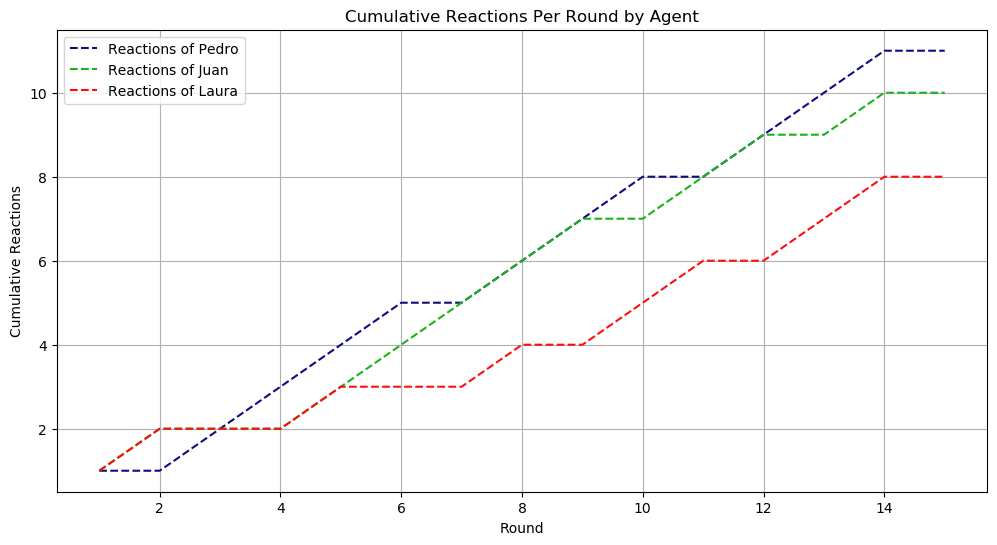

In [81]:
def generate_reactions_plot(data, agents):
    colors = {
        "Pedro": (0.05, 0.05, 0.5),
        "Juan": (0.1, 0.7, 0.1),
        "Laura": (1.0, 0.05, 0.05)
    }
    plt.figure(figsize=(12, 6))
    for agent in agents:
        reactions = data[agent]
        rounds = list(range(1, len(reactions) + 1))
        plt.plot(rounds, reactions, label=f"Reactions of {agent}", linestyle="--", color=colors[agent])
    plt.xlabel("Round")
    plt.ylabel("Cumulative Reactions")
    plt.title("Cumulative Reactions Per Round by Agent")
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{charts_folder_path}/cumulative_reactions.png', dpi=300)
    plt.show() 
generate_reactions_plot(experiment_data["react_per_round"], agents)


## Explored Map per Round 

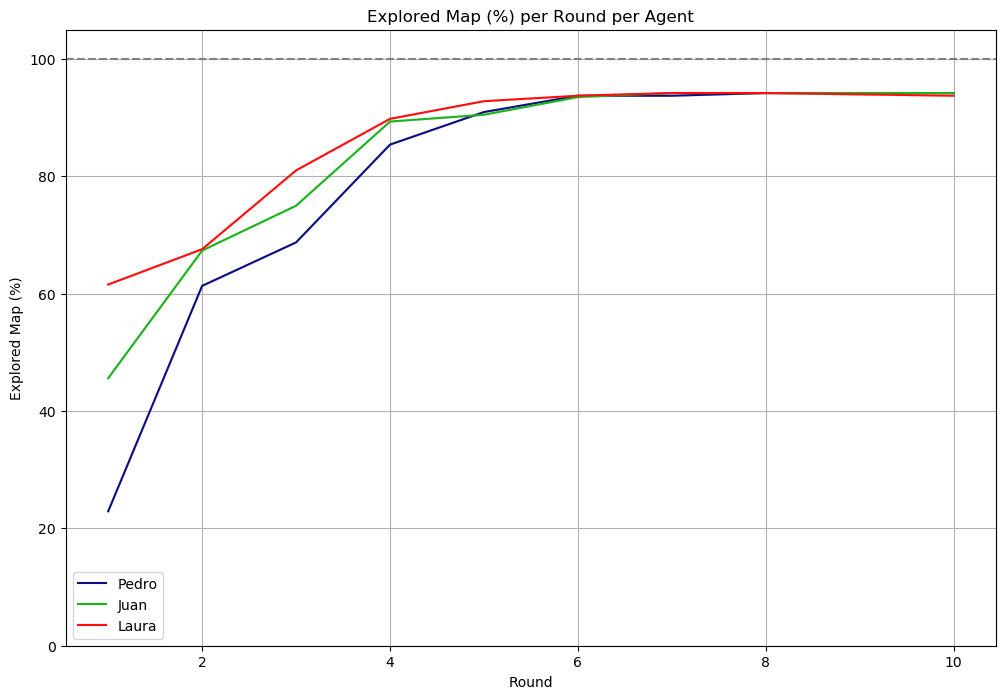

In [82]:
explored_map_per_round = experiment_data["explored_map_per_round"]
agents = explored_map_per_round.keys()
colors = {
        "Pedro": (0.05, 0.05, 0.5),
        "Juan": (0.1, 0.7, 0.1),
        "Laura": (1.0, 0.05, 0.05)
    }
plt.figure(figsize=(12, 8))
for agent in agents:
    data_agent = [explored_map_per_round[agent][1:11]]
    average_agent = np.mean(data_agent, axis=0)
    std_dev_agent = np.std(data_agent, axis=0)
    plt.plot(list(range(1, len(data_agent[0])+1)), average_agent, label=agent, color=colors[agent])
    plt.fill_between(list(range(1, len(data_agent[0])+1)), average_agent - std_dev_agent, average_agent + std_dev_agent, color=colors[agent], alpha=0.1)

plt.axhline(y=100, color='gray', linestyle='--')
plt.title('Explored Map (%) per Round per Agent')
plt.ylim(0, 105)
plt.xlabel('Round')
plt.ylabel('Explored Map (%)')
plt.legend()
plt.grid(True)
plt.savefig(f'{charts_folder_path}/explored_map_per_round.png', dpi=300)
plt.show()

# Updated Map per Round

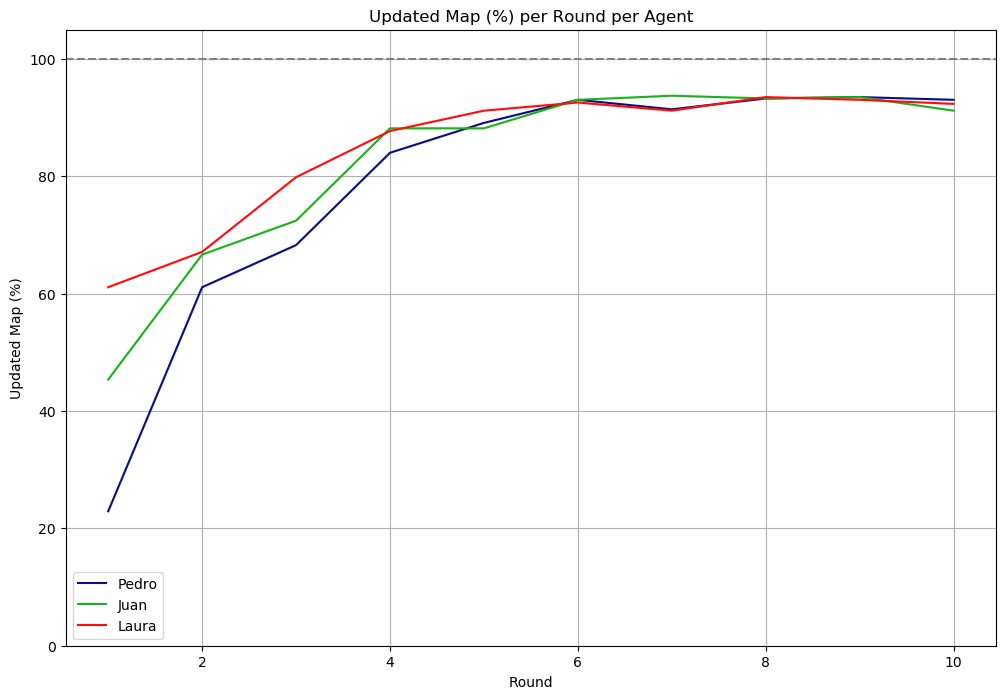

In [84]:
updated_map_per_round = experiment_data["updated_map_per_round"]
agents = updated_map_per_round.keys()
colors = {
        "Pedro": (0.05, 0.05, 0.5),
        "Juan": (0.1, 0.7, 0.1),
        "Laura": (1.0, 0.05, 0.05)
    }
plt.figure(figsize=(12, 8))
for agent in agents:
    data_agent = [updated_map_per_round[agent][1:11]]
    average_agent = np.mean(data_agent, axis=0)
    std_dev_agent = np.std(data_agent, axis=0)
    plt.plot(list(range(1, len(data_agent[0])+1)), average_agent, label=agent, color=colors[agent])
    plt.fill_between(list(range(1, len(data_agent[0])+1)), average_agent - std_dev_agent, average_agent + std_dev_agent, color=colors[agent], alpha=0.1)

plt.axhline(y=100, color='gray', linestyle='--')
plt.title('Updated Map (%) per Round per Agent')
plt.ylim(0, 105)
plt.xlabel('Round')
plt.ylabel('Updated Map (%)')
plt.legend()
plt.grid(True)
plt.savefig(f'{charts_folder_path}/updated_map_per_round.png', dpi=300)
plt.show()

## Average Known Trees

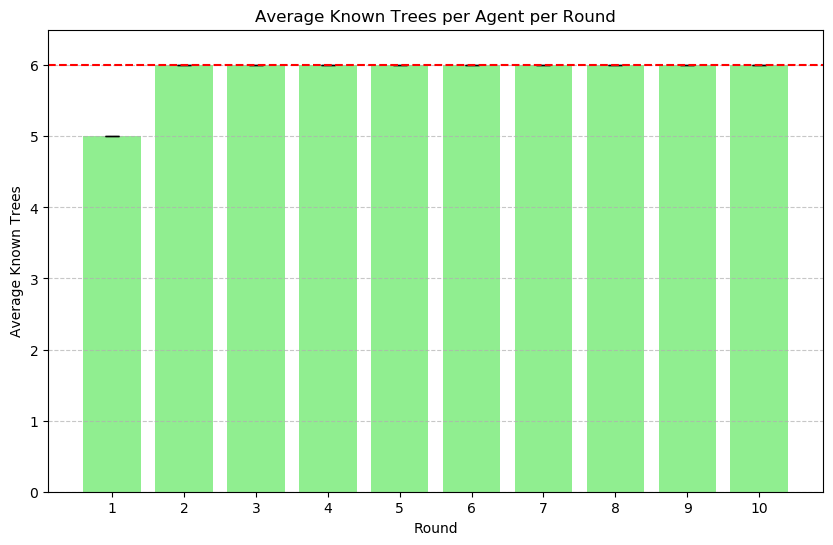

In [39]:
known_trees_per_round = experiment_data["known_trees_per_round"]
agents = known_trees_per_round.keys()

min_ = min([len(known_trees_per_round[agent]) for agent in agents])
all_agents_known_trees_per_round = np.array([
    [known_trees_per_round[agent][1:11] for agent in agents]
])

mean_data = np.mean(all_agents_known_trees_per_round, axis=1)
overall_mean = np.mean(mean_data, axis=0)
std_dev_data = np.std(all_agents_known_trees_per_round, axis=1)
overall_std_dev = np.std(std_dev_data, axis=0)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(overall_mean) + 1), overall_mean, yerr=overall_std_dev, capsize=5, color='lightgreen', ecolor='black')
plt.axhline(y=6, color='red', linestyle='--')
plt.xlabel('Round')
plt.ylabel('Average Known Trees')
plt.title('Average Known Trees per Agent per Round')
plt.xticks(range(1, len(overall_mean) + 1))
plt.ylim(0, 6.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(f'{charts_folder_path}/average_known_trees.png', dpi=300)
plt.show()

# Attack Network

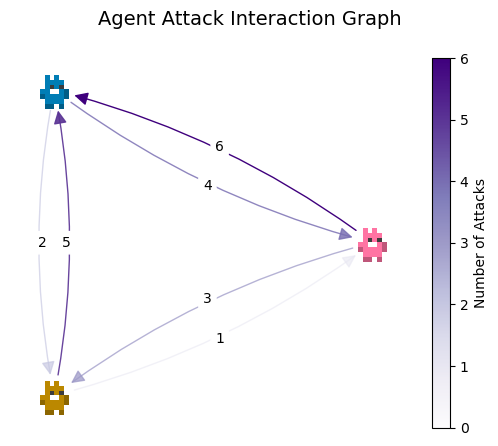

In [41]:
#experiment_data["attacks"] = {'Pedro':{'Juan': 6, 'Laura': 3}, 'Juan':{'Pedro': 4, 'Laura': 2}, 'Laura':{'Pedro': 1, 'Juan': 5}}
# Crear el grafo dirigido
G = nx.DiGraph()

# Añadir nodos y ejes con atributos de peso
for attacker, victims in experiment_data["attacks"].items():
    G.add_node(attacker)
    for victim, times in victims.items():
        G.add_edge(attacker, victim, weight=times)

pos = nx.layout.circular_layout(G)

# Función para añadir imágenes como nodos
def add_image_node(ax, pos, image_path, zoom):
    for n in pos:
        image = plt.imread(image_path[n])
        im = OffsetImage(image, zoom=zoom)
        ab = AnnotationBbox(im, pos[n], xybox=(0, 0), xycoords='data', boxcoords="offset points", frameon=False)
        ax.add_artist(ab)

# Dibujar nodos como imágenes
fig, ax = plt.subplots()
add_image_node(ax, pos, {"Pedro":"../data/assets/pink_avatar.png", "Juan":"../data/assets/blue_avatar.png", "Laura":"../data/assets/yellow_avatar.png"}, 0.35)

# Dibujar ejes
edges = nx.draw_networkx_edges(G, pos, arrowstyle='-|>',
                               arrowsize=20, width=1, connectionstyle='arc3,rad=0.1',
                                min_source_margin=15, min_target_margin=15,)

# Etiquetar los ejes con los pesos
edge_weights = nx.get_edge_attributes(G,'weight')
curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
straight_edges = list(set(G.edges()) - set(curved_edges))
curved_edge_labels = {edge: edge_weights[edge] for edge in curved_edges}
straight_edge_labels = {edge: edge_weights[edge] for edge in straight_edges}
my_draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=curved_edge_labels,rotate=False,rad =  0.1)
nx.draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=straight_edge_labels,rotate=False)

# Crear un mapa de colores basado en el peso
weights = [G[u][v]['weight'] for u, v in G.edges()]
cmap = plt.cm.get_cmap('Purples') 
norm = mpl.colors.Normalize(vmin=0, vmax=max(weights))
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Ajustar transparencia de los ejes y colorear basado en el peso
for edge, weight in zip(edges, weights):
    edge.set_alpha(0.5 + 0.5 * weight / max(weights))  # Ajustar la transparencia basada en el peso
    edge.set_color(cmap(norm(weight)))

# Añadir barra de colores
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Number of Attacks')

ax.set_axis_off()
plt.suptitle('Agent Attack Interaction Graph', fontsize=14)
plt.savefig(f'{charts_folder_path}/attack_network.png', dpi=300)
plt.show()


# Reflection Comunnication Network

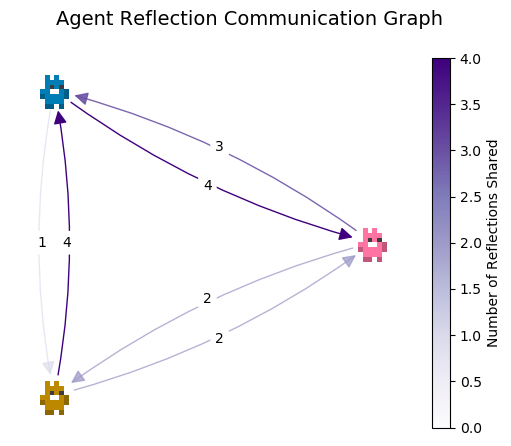

In [85]:
#experiment_data["attacks"] = {'Pedro':{'Juan': 6, 'Laura': 3}, 'Juan':{'Pedro': 4, 'Laura': 2}, 'Laura':{'Pedro': 1, 'Juan': 5}}
# Crear el grafo dirigido
G = nx.DiGraph()

# Añadir nodos y ejes con atributos de peso
for attacker, victims in experiment_data["reflections"].items():
    G.add_node(attacker)
    for victim, times in victims.items():
        G.add_edge(attacker, victim, weight=times)

pos = nx.layout.circular_layout(G)

# Función para añadir imágenes como nodos
def add_image_node(ax, pos, image_path, zoom):
    for n in pos:
        image = plt.imread(image_path[n])
        im = OffsetImage(image, zoom=zoom)
        ab = AnnotationBbox(im, pos[n], xybox=(0, 0), xycoords='data', boxcoords="offset points", frameon=False)
        ax.add_artist(ab)

# Dibujar nodos como imágenes
fig, ax = plt.subplots()
add_image_node(ax, pos, {"Pedro":"../data/assets/pink_avatar.png", "Juan":"../data/assets/blue_avatar.png", "Laura":"../data/assets/yellow_avatar.png"}, 0.35)

# Dibujar ejes
edges = nx.draw_networkx_edges(G, pos, arrowstyle='-|>',
                               arrowsize=20, width=1, connectionstyle='arc3,rad=0.1',
                                min_source_margin=15, min_target_margin=15,)

# Etiquetar los ejes con los pesos
edge_weights = nx.get_edge_attributes(G,'weight')
curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
straight_edges = list(set(G.edges()) - set(curved_edges))
curved_edge_labels = {edge: edge_weights[edge] for edge in curved_edges}
straight_edge_labels = {edge: edge_weights[edge] for edge in straight_edges}
my_draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=curved_edge_labels,rotate=False,rad =  0.1)
nx.draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=straight_edge_labels,rotate=False)

# Crear un mapa de colores basado en el peso
weights = [G[u][v]['weight'] for u, v in G.edges()]
cmap = plt.cm.get_cmap('Purples') 
norm = mpl.colors.Normalize(vmin=0, vmax=max(weights))
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Ajustar transparencia de los ejes y colorear basado en el peso
for edge, weight in zip(edges, weights):
    edge.set_alpha(0.5 + 0.5 * weight / max(weights))  # Ajustar la transparencia basada en el peso
    edge.set_color(cmap(norm(weight)))

# Añadir barra de colores
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Number of Reflections Shared')

ax.set_axis_off()
plt.suptitle('Agent Reflection Communication Graph', fontsize=14)
plt.savefig(f'{charts_folder_path}/reflection_communication_network.png', dpi=300)
plt.show()


# Attack Effectiveness Bar

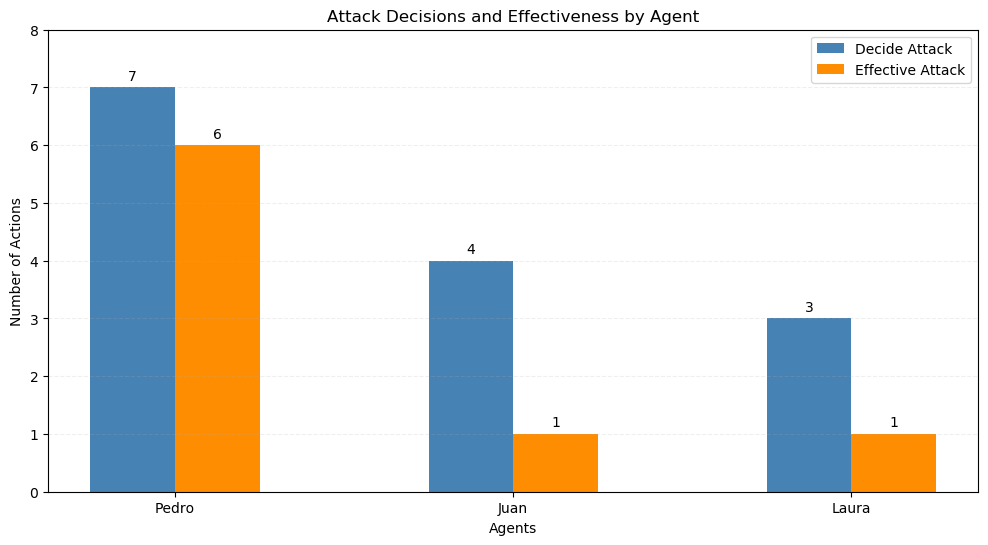

In [43]:
# Datos proporcionados
times_decide_to_attack = custom_indicators["times_decide_to_attack"]
effective_attack = custom_indicators["effective_attack"]

# Nombres de los agentes
agents = list(times_decide_to_attack.keys())

# Datos para las barras
decisions = [times_decide_to_attack[agent] for agent in agents]
effectiveness = [effective_attack[agent] for agent in agents]

# Creación de la figura y el eje
fig, ax = plt.subplots(figsize=(12, 6))

# Índices para las barras
x = np.arange(len(agents))  # posiciones de los agentes
width = 0.25  # ancho de las barras

# Barras para "decidir atacar"
rects1 = ax.bar(x - width/2, decisions, width, label='Decide Attack', color="#4682b4")

# Barras para "ataque efectivo"
rects2 = ax.bar(x + width/2, effectiveness, width, label='Effective Attack', color="#ff8d01")

# Etiquetas y títulos
ax.set_xlabel('Agents')
ax.set_ylabel('Number of Actions')
ax.set_ylim(0, max(decisions + effectiveness) + 1)
ax.set_title('Attack Decisions and Effectiveness by Agent')
ax.set_xticks(x)
ax.set_xticklabels(agents)
ax.grid(axis='y', linestyle='--', alpha=0.2)
ax.legend()

# Función para añadir etiquetas sobre cada barra
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

# Añadir etiquetas a las barras
autolabel(rects1)
autolabel(rects2)

# Mostrar la gráfica
plt.savefig(f'{charts_folder_path}/attack_effectiveness_bar.png', dpi=300)
plt.show()


# Attack Effectiveness Pie

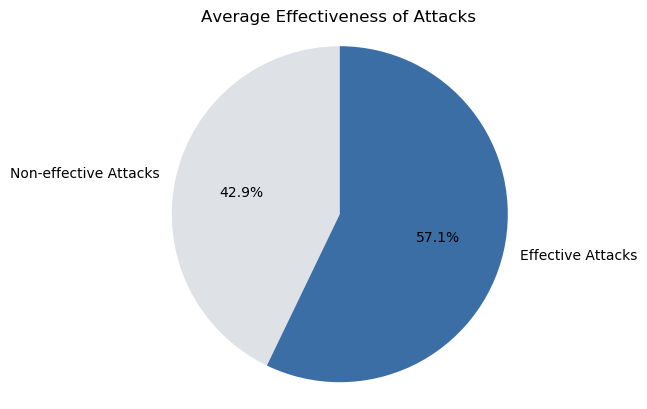

In [44]:
# Calculando la efectividad promedio
total_decisions = sum(decisions)
total_effective = sum(effectiveness)

# Porcentajes para el gráfico de torta
attack_ratios = [total_effective, total_decisions - total_effective][::-1]

# Etiquetas para el gráfico de torta
labels = ['Effective Attacks', 'Non-effective Attacks'][::-1]

# Colores para las secciones del gráfico
colors = ["#3a6ea5", "#dee2e6"][::-1]

# Creación del gráfico de torta
fig1, ax1 = plt.subplots()
ax1.pie(attack_ratios, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Igualar aspecto para que se dibuje como un círculo
ax1.axis('equal')  

# Título del gráfico
plt.title('Average Effectiveness of Attacks')

# Mostrar el gráfico
plt.savefig(f'{charts_folder_path}/attack_effectiveness_pie.png', dpi=300)
plt.show()

# Experiment Charts

In [113]:
experiment_folder = "test_metrics_5"
experiment_path = os.path.join("../logs", experiment_folder)
simulations_folders = [name for name in os.listdir(experiment_path) if os.path.isdir(os.path.join(experiment_path, name))]
json_files = []
for simulation in simulations_folders:
    json_files.append(os.path.join(experiment_path, simulation, "snowartz_metrics.json"))
charts_folder_path = os.path.join(experiment_path, "charts")
#os.makedirs(charts_folder_path)
json_files

['../logs/test_metrics_5/2024-05-13--18-51-58__sim_1/snowartz_metrics.json',
 '../logs/test_metrics_5/2024-05-13--18-52-03__sim_2/snowartz_metrics.json',
 '../logs/test_metrics_5/charts/snowartz_metrics.json']

## Updated Frequency Map

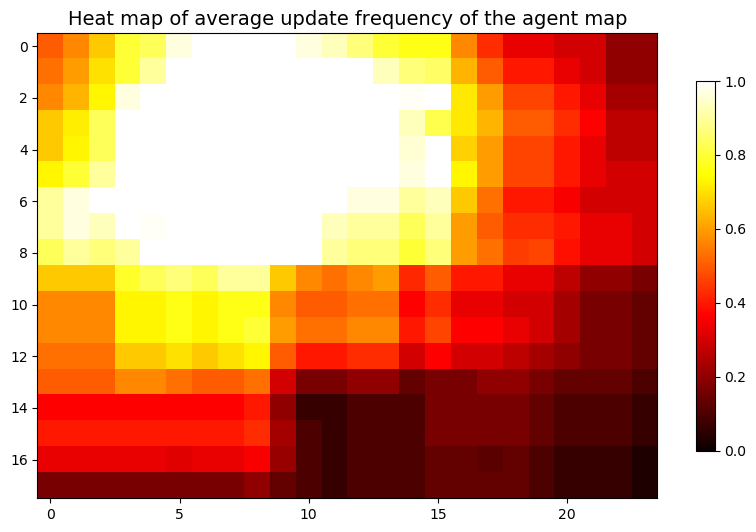

In [96]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

def load_and_process_data(json_file_path):
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    return data

def normalize_matrices(experiment_data):
    updated_frequency_map = experiment_data["updated_frequency_map"]
    react_per_round = experiment_data["react_per_round"]
    normalized_matrices = []
    for agent, matrix in updated_frequency_map.items():
        normalized_matrix = np.array(matrix) / np.int64(len(react_per_round[agent]))
        normalized_matrices.append(normalized_matrix)
    return normalized_matrices

def calculate_average_matrix(normalized_matrices):
    return np.mean(normalized_matrices, axis=0)

def plot_heat_map(average_matrix):
    plt.figure(figsize=(10, 8))
    plt.imshow(average_matrix, cmap='hot', interpolation='nearest', vmin=0, vmax=1)
    plt.colorbar(shrink=0.6)
    plt.title('Heat map of average update frequency of the agent map', fontsize=14)
    plt.savefig(f'{charts_folder_path}/update_map_heat_map.png', dpi=300)
    plt.show()

def process_experiment_folder(experiment_folder):
    experiment_path = os.path.join("../logs", experiment_folder)
    simulations_folders = [name for name in os.listdir(experiment_path) if name != "charts" and os.path.isdir(os.path.join(experiment_path, name))]
    
    all_normalized_matrices = []
    for simulation in simulations_folders:
        json_file_path = os.path.join(experiment_path, simulation, "snowartz_metrics.json")
        experiment_data = load_and_process_data(json_file_path)
        normalized_matrices = normalize_matrices(experiment_data)
        all_normalized_matrices.extend(normalized_matrices)
    
    average_matrix = calculate_average_matrix(all_normalized_matrices)
    plot_heat_map(average_matrix)

process_experiment_folder(experiment_folder)


## Apple Consumption Based on Remaining Apples on Tree

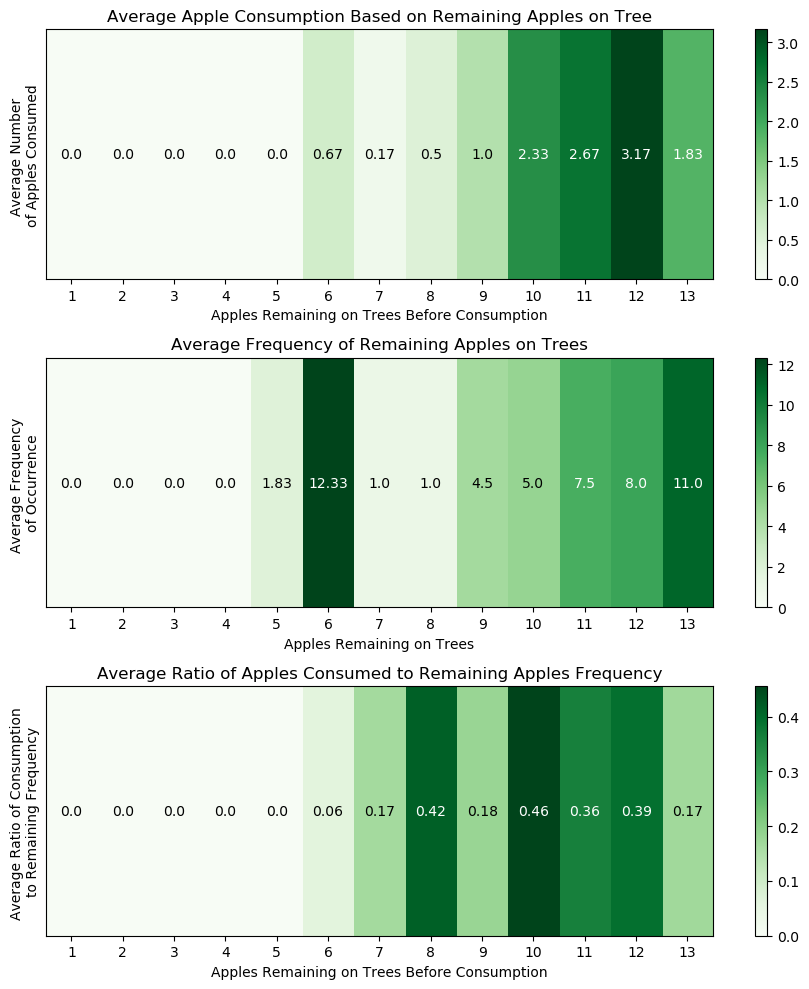

In [97]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

def load_and_process_data(json_file_path):
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    return data

def calculate_ratios(apples, totals):
    apples = np.array(apples, dtype=float)
    totals = np.array(totals, dtype=float)
    totals_copy = totals.copy()
    totals_copy[totals_copy == 0] = 1  # Evitar división por cero
    ratio = apples / totals_copy
    return np.nan_to_num(ratio), np.nan_to_num(totals)  # Limpia NaN

def plot_heatmap(data, title, xlabel, ylabel, ax):
    data = np.array(data, dtype=float)
    im = ax.imshow(data.reshape(1, -1), cmap='Greens', aspect='auto', vmin=0, vmax=np.max(data))
    plt.colorbar(im, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(data)))
    ax.set_xticklabels(np.arange(1, len(data) + 1))
    ax.set_yticks([])
    for i, val in enumerate(data):
        ax.text(i, 0, round(val, 2), ha='center', va='center', color='white' if val > np.max(data)/2 else 'black')

def process_apple_consumption_folder(experiment_folder):
    experiment_path = os.path.join("../logs", experiment_folder)
    simulations_folders = [name for name in os.listdir(experiment_path) if name != "charts" and os.path.isdir(os.path.join(experiment_path, name))]
    
    all_apple_consumption = []
    all_remaining_totals = []
    all_ratios = []
    
    for simulation in simulations_folders:
        json_file_path = os.path.join(experiment_path, simulation, "snowartz_metrics.json")
        experiment_data = load_and_process_data(json_file_path)
        agents = experiment_data["apple_consumption_per_remaining"].keys()
        
        for agent in agents:
            apple_consumption = experiment_data["apple_consumption_per_remaining"][agent]
            remaining = experiment_data["remaining_total"][agent]
            ratio, total = calculate_ratios(apple_consumption, remaining)
            
            all_apple_consumption.append(apple_consumption)
            all_remaining_totals.append(total)
            all_ratios.append(ratio)
    
    average_apple_consumption = np.mean(all_apple_consumption, axis=0)
    average_remaining_total = np.mean(all_remaining_totals, axis=0)
    average_ratio = np.mean(all_ratios, axis=0)
    
    fig, axs = plt.subplots(3, 1, figsize=(9, 10))
    plot_heatmap(average_apple_consumption, f"Average Apple Consumption Based on Remaining Apples on Tree", "Apples Remaining on Trees Before Consumption", "Average Number \nof Apples Consumed", axs[0])
    plot_heatmap(average_remaining_total, f"Average Frequency of Remaining Apples on Trees", "Apples Remaining on Trees", "Average Frequency \nof Occurrence", axs[1])
    plot_heatmap(average_ratio, f"Average Ratio of Apples Consumed to Remaining Apples Frequency", "Apples Remaining on Trees Before Consumption", "Average Ratio of Consumption \nto Remaining Frequency", axs[2])
    plt.tight_layout()
    plt.savefig(f'{charts_folder_path}/average_consumption_by_remaining_heatmaps.png', dpi=300)
    plt.show()

# Uso de la función
process_apple_consumption_folder(experiment_folder)


## Cummulative Reactions per Round

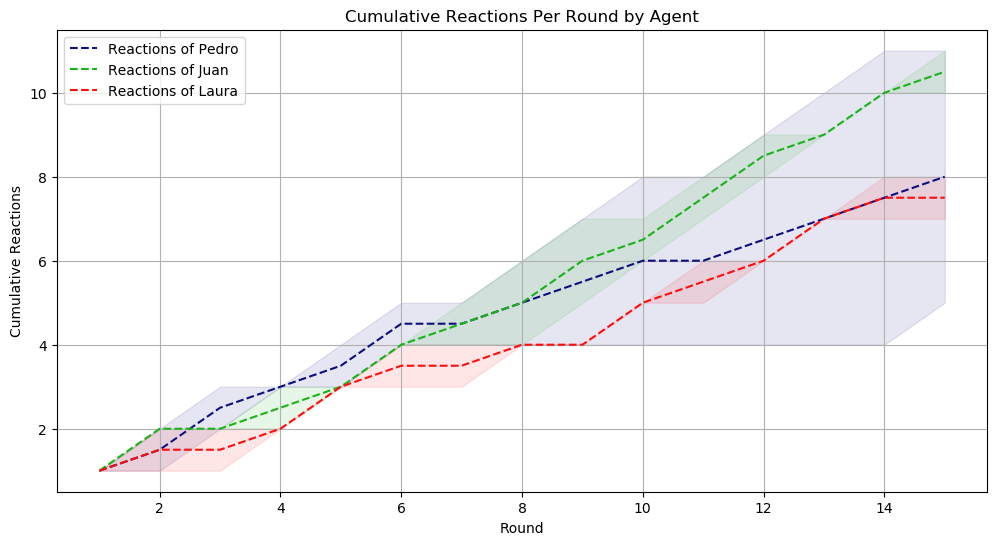

In [98]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

def load_and_process_data(json_file_path):
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    return data

def collect_all_agents_data(experiment_folder):
    experiment_path = os.path.join("../logs", experiment_folder)
    simulations_folders = [name for name in os.listdir(experiment_path) if name != "charts" and os.path.isdir(os.path.join(experiment_path, name))]
    
    all_data = {}
    for simulation in simulations_folders:
        json_file_path = os.path.join(experiment_path, simulation, "snowartz_metrics.json")
        experiment_data = load_and_process_data(json_file_path)
        react_per_round = experiment_data["react_per_round"]
        for agent, reactions in react_per_round.items():
            if agent not in all_data:
                all_data[agent] = []
            all_data[agent].append(reactions)
    return all_data

def plot_reactions_with_stats(all_data, colors):
    plt.figure(figsize=(12, 6))
    for agent, data_agent in all_data.items():
        data_agent = np.array(data_agent)
        average_agent = np.mean(data_agent, axis=0)
        std_dev_agent = np.std(data_agent, axis=0)
        
        rounds = np.arange(1, len(average_agent) + 1)
        plt.plot(rounds, average_agent, label=f"Reactions of {agent}", linestyle="--", color=colors[agent])
        plt.fill_between(rounds, average_agent - std_dev_agent, average_agent + std_dev_agent, color=colors[agent], alpha=0.1)

    plt.xlabel("Round")
    plt.ylabel("Cumulative Reactions")
    plt.title("Cumulative Reactions Per Round by Agent")
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{charts_folder_path}/cumulative_reactions.png', dpi=300)
    plt.show()

def process_reactions_folder(experiment_folder):
    colors = {
        "Pedro": (0.05, 0.05, 0.5),
        "Juan": (0.1, 0.7, 0.1),
        "Laura": (1.0, 0.05, 0.05)
    }
    all_data = collect_all_agents_data(experiment_folder)
    plot_reactions_with_stats(all_data, colors)

# Uso de la función
process_reactions_folder(experiment_folder)


## Explored Map per Round 

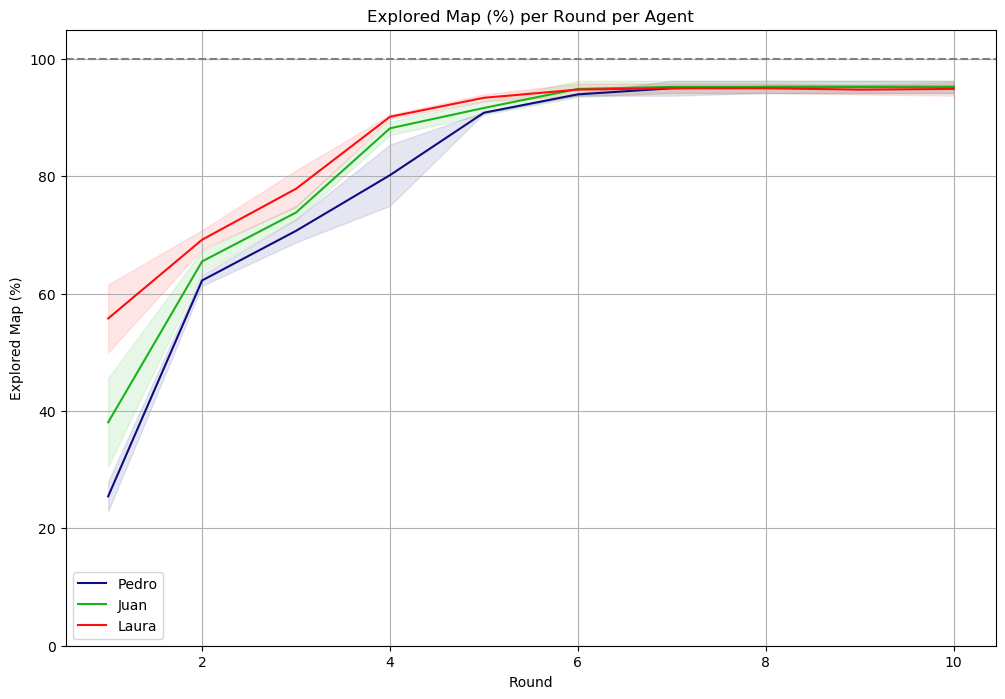

In [99]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

def load_and_process_data(json_file_path):
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    return data

def collect_map_exploration_data(experiment_folder):
    experiment_path = os.path.join("../logs", experiment_folder)
    simulations_folders = [name for name in os.listdir(experiment_path) if name != "charts" and os.path.isdir(os.path.join(experiment_path, name))]
    
    all_data = {}
    for simulation in simulations_folders:
        json_file_path = os.path.join(experiment_path, simulation, "snowartz_metrics.json")
        experiment_data = load_and_process_data(json_file_path)
        explored_map_per_round = experiment_data["explored_map_per_round"]
        for agent, exploration_data in explored_map_per_round.items():
            if agent not in all_data:
                all_data[agent] = []
            all_data[agent].append(exploration_data[1:11])  # Assuming we need the first 10 rounds data only

    return all_data

def plot_map_exploration(all_data, colors):
    plt.figure(figsize=(12, 8))
    for agent, data_agent in all_data.items():
        data_agent = np.array(data_agent)
        average_agent = np.mean(data_agent, axis=0)
        std_dev_agent = np.std(data_agent, axis=0)
        
        rounds = np.arange(1, len(average_agent) + 1)
        plt.plot(rounds, average_agent, label=agent, color=colors[agent])
        plt.fill_between(rounds, average_agent - std_dev_agent, average_agent + std_dev_agent, color=colors[agent], alpha=0.1)

    plt.axhline(y=100, color='gray', linestyle='--')
    plt.title('Explored Map (%) per Round per Agent')
    plt.ylim(0, 105)
    plt.xlabel('Round')
    plt.ylabel('Explored Map (%)')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{charts_folder_path}/explored_map_per_round.png', dpi=300)
    plt.show()

def process_map_exploration_folder(experiment_folder):
    colors = {
        "Pedro": (0.05, 0.05, 0.5),
        "Juan": (0.1, 0.7, 0.1),
        "Laura": (1.0, 0.05, 0.05)
    }
    all_data = collect_map_exploration_data(experiment_folder)
    plot_map_exploration(all_data, colors)

# Uso de la función
process_map_exploration_folder(experiment_folder)


## Updated Map per Round

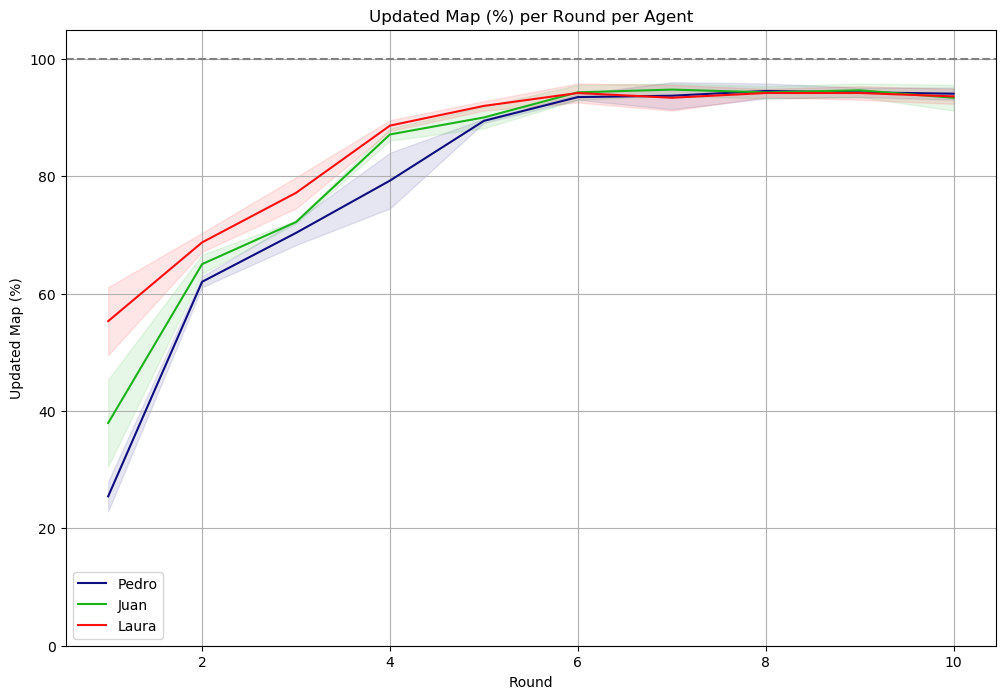

In [100]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

def load_and_process_data(json_file_path):
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    return data

def collect_map_exploration_data(experiment_folder):
    experiment_path = os.path.join("../logs", experiment_folder)
    simulations_folders = [name for name in os.listdir(experiment_path) if name != "charts" and os.path.isdir(os.path.join(experiment_path, name))]
    
    all_data = {}
    for simulation in simulations_folders:
        json_file_path = os.path.join(experiment_path, simulation, "snowartz_metrics.json")
        experiment_data = load_and_process_data(json_file_path)
        updated_map_per_round = experiment_data["updated_map_per_round"]
        for agent, exploration_data in updated_map_per_round.items():
            if agent not in all_data:
                all_data[agent] = []
            all_data[agent].append(exploration_data[1:11])  # Assuming we need the first 10 rounds data only

    return all_data

def plot_map_exploration(all_data, colors):
    plt.figure(figsize=(12, 8))
    for agent, data_agent in all_data.items():
        data_agent = np.array(data_agent)
        average_agent = np.mean(data_agent, axis=0)
        std_dev_agent = np.std(data_agent, axis=0)
        
        rounds = np.arange(1, len(average_agent) + 1)
        plt.plot(rounds, average_agent, label=agent, color=colors[agent])
        plt.fill_between(rounds, average_agent - std_dev_agent, average_agent + std_dev_agent, color=colors[agent], alpha=0.1)

    plt.axhline(y=100, color='gray', linestyle='--')
    plt.title('Updated Map (%) per Round per Agent')
    plt.ylim(0, 105)
    plt.xlabel('Round')
    plt.ylabel('Updated Map (%)')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{charts_folder_path}/updated_map_per_round.png', dpi=300)
    plt.show()

def process_map_exploration_folder(experiment_folder):
    colors = {
        "Pedro": (0.05, 0.05, 0.5),
        "Juan": (0.1, 0.7, 0.1),
        "Laura": (1.0, 0.05, 0.05)
    }
    all_data = collect_map_exploration_data(experiment_folder)
    plot_map_exploration(all_data, colors)

# Uso de la función
process_map_exploration_folder(experiment_folder)


## Average Known Trees

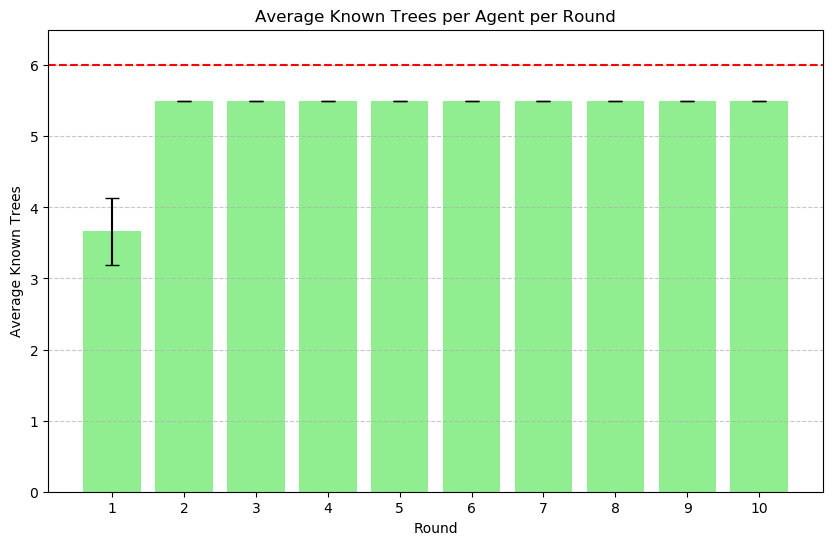

In [101]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

def load_and_process_data(json_file_path):
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    return data

def collect_known_trees_data(experiment_folder):
    experiment_path = os.path.join("../logs", experiment_folder)
    simulations_folders = [name for name in os.listdir(experiment_path) if name != "charts" and os.path.isdir(os.path.join(experiment_path, name))]
    
    all_data = []
    for simulation in simulations_folders:
        json_file_path = os.path.join(experiment_path, simulation, "snowartz_metrics.json")
        experiment_data = load_and_process_data(json_file_path)
        known_trees_per_round = experiment_data["known_trees_per_round"]
        agents = known_trees_per_round.keys()
        data = np.array([known_trees_per_round[agent][1:11] for agent in agents if len(known_trees_per_round[agent]) >= 11])
        all_data.append(data)
    
    return np.array(all_data)

def plot_known_trees(all_data):
    mean_data = np.mean(all_data, axis=1)  # Average per simulation
    overall_mean = np.mean(mean_data, axis=0)  # Overall mean
    std_dev_data = np.std(all_data, axis=1)  # Standard deviation per simulation
    overall_std_dev = np.std(std_dev_data, axis=0)  # Overall standard deviation

    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(overall_mean) + 1), overall_mean, yerr=overall_std_dev, capsize=5, color='lightgreen', ecolor='black')
    plt.axhline(y=6, color='red', linestyle='--')
    plt.xlabel('Round')
    plt.ylabel('Average Known Trees')
    plt.title('Average Known Trees per Agent per Round')
    plt.xticks(range(1, len(overall_mean) + 1))
    plt.ylim(0, 6.5)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig(f'{charts_folder_path}/average_known_trees.png', dpi=300)
    plt.show()

def process_known_trees_folder(experiment_folder):
    all_data = collect_known_trees_data(experiment_folder)
    plot_known_trees(all_data)

# Uso de la función
process_known_trees_folder(experiment_folder)


## Average Attack Network

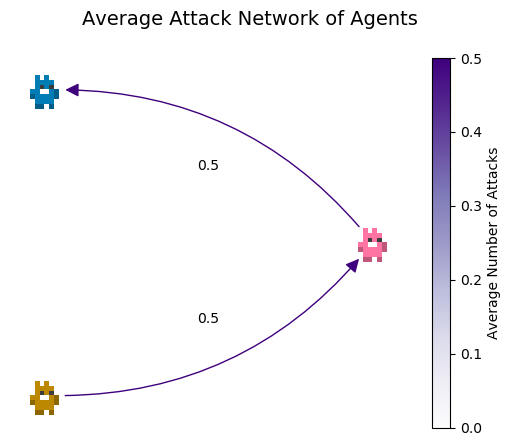

In [107]:
def load_and_process_data(json_file_path):
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    return data

def aggregate_attacks_data(experiment_folder):
    experiment_path = os.path.join("../logs", experiment_folder)
    simulations_folders = [name for name in os.listdir(experiment_path) if name != "charts" and os.path.isdir(os.path.join(experiment_path, name))]
    
    combined_attacks = {}
    all_agents = set()
    for simulation in simulations_folders:
        json_file_path = os.path.join(experiment_path, simulation, "snowartz_metrics.json")
        experiment_data = load_and_process_data(json_file_path)
        attacks = experiment_data["attacks"]
        all_agents.update(attacks.keys())

        for attacker in attacks:
            for agent in all_agents:
                if agent!=attacker and agent not in attacks[attacker]:
                    attacks[attacker][agent] = 0

        for attacker in attacks:
            if attacker not in combined_attacks:
                combined_attacks[attacker] = {}
            for victim, times in attacks[attacker].items():
                if victim not in combined_attacks[attacker]:
                    combined_attacks[attacker][victim] = []
                combined_attacks[attacker][victim].append(times)

    # Average the attacks over all experiments
    for attacker, victims in combined_attacks.items():
        for victim, times_list in victims.items():
            combined_attacks[attacker][victim] = np.mean(times_list)

    return combined_attacks

def plot_attack_network(combined_attacks, image_paths):
    G = nx.DiGraph()
    for attacker, victims in combined_attacks.items():
        G.add_node(attacker)
        for victim, times in victims.items():
            if times > 0:  # Only add edge if there's at least one attack on average
                G.add_edge(attacker, victim, weight=times)

    pos = nx.layout.circular_layout(G)
    fig, ax = plt.subplots()
    add_image_node(ax, pos, image_paths, 0.35)
    edges = nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, width=1, 
                                   connectionstyle='arc3,rad=0.25', min_source_margin=15, min_target_margin=15)
    
    # Etiquetar los ejes con los pesos
    edge_weights = nx.get_edge_attributes(G,'weight')
    curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
    straight_edges = list(set(G.edges()) - set(curved_edges))
    curved_edge_labels = {edge: edge_weights[edge] for edge in curved_edges}
    straight_edge_labels = {edge: edge_weights[edge] for edge in straight_edges}
    my_draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=curved_edge_labels,rotate=False,rad =  0.25)
    nx.draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=straight_edge_labels,rotate=False)


    weights = list(edge_weights.values())
    cmap = plt.cm.get_cmap('Purples')
    norm = mpl.colors.Normalize(vmin=0, vmax=max(weights) if weights else 1)
    sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    for edge, weight in zip(edges, weights):
        edge.set_alpha(0.5 + 0.5 * weight / max(weights) if weights else 0.5)
        edge.set_color(cmap(norm(weight)))

    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('Average Number of Attacks')

    ax.set_axis_off()
    plt.suptitle('Average Attack Network of Agents', fontsize=14)
    plt.savefig(f'{charts_folder_path}/attack_network.png', dpi=300)
    plt.show()

def add_image_node(ax, pos, image_path, zoom):
    for n, img_path in image_path.items():
        image = plt.imread(img_path)
        im = OffsetImage(image, zoom=zoom)
        ab = AnnotationBbox(im, pos[n], xybox=(0, 0), xycoords='data', boxcoords="offset points", frameon=False)
        ax.add_artist(ab)

# Usage of the function
combined_attacks = aggregate_attacks_data(experiment_folder)
image_paths = {"Pedro":"../data/assets/pink_avatar.png", "Juan":"../data/assets/blue_avatar.png", "Laura":"../data/assets/yellow_avatar.png"}
plot_attack_network(combined_attacks, image_paths)

## Average Reflection Communication Network

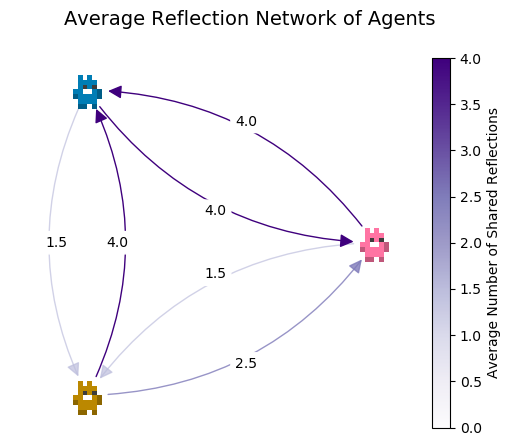

In [108]:
def load_and_process_data(json_file_path):
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    return data

def aggregate_attacks_data(experiment_folder):
    experiment_path = os.path.join("../logs", experiment_folder)
    simulations_folders = [name for name in os.listdir(experiment_path) if name != "charts" and os.path.isdir(os.path.join(experiment_path, name))]
    
    combined_attacks = {}
    all_agents = set()
    for simulation in simulations_folders:
        json_file_path = os.path.join(experiment_path, simulation, "snowartz_metrics.json")
        experiment_data = load_and_process_data(json_file_path)
        reflections = experiment_data["reflections"]
        all_agents.update(reflections.keys())

        for attacker in reflections:
            for agent in all_agents:
                if agent!=attacker and agent not in reflections[attacker]:
                    reflections[attacker][agent] = 0

        for attacker in reflections:
            if attacker not in combined_attacks:
                combined_attacks[attacker] = {}
            for victim, times in reflections[attacker].items():
                if victim not in combined_attacks[attacker]:
                    combined_attacks[attacker][victim] = []
                combined_attacks[attacker][victim].append(times)

    # Average the reflections over all experiments
    for attacker, victims in combined_attacks.items():
        for victim, times_list in victims.items():
            combined_attacks[attacker][victim] = np.mean(times_list)

    return combined_attacks

def plot_attack_network(combined_attacks, image_paths):
    G = nx.DiGraph()
    for attacker, victims in combined_attacks.items():
        G.add_node(attacker)
        for victim, times in victims.items():
            if times > 0:  # Only add edge if there's at least one attack on average
                G.add_edge(attacker, victim, weight=times)

    pos = nx.layout.circular_layout(G)
    fig, ax = plt.subplots()
    add_image_node(ax, pos, image_paths, 0.35)
    edges = nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, width=1, 
                                   connectionstyle='arc3,rad=0.25', min_source_margin=15, min_target_margin=15)
    
    # Etiquetar los ejes con los pesos
    edge_weights = nx.get_edge_attributes(G,'weight')
    curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
    straight_edges = list(set(G.edges()) - set(curved_edges))
    curved_edge_labels = {edge: edge_weights[edge] for edge in curved_edges}
    straight_edge_labels = {edge: edge_weights[edge] for edge in straight_edges}
    my_draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=curved_edge_labels,rotate=False,rad =  0.25)
    nx.draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=straight_edge_labels,rotate=False)


    weights = list(edge_weights.values())
    cmap = plt.cm.get_cmap('Purples')
    norm = mpl.colors.Normalize(vmin=0, vmax=max(weights) if weights else 1)
    sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    for edge, weight in zip(edges, weights):
        edge.set_alpha(0.5 + 0.5 * weight / max(weights) if weights else 0.5)
        edge.set_color(cmap(norm(weight)))

    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('Average Number of Shared Reflections')

    ax.set_axis_off()
    plt.suptitle('Average Reflection Network of Agents', fontsize=14)
    plt.savefig(f'{charts_folder_path}/reflection_network.png', dpi=300)
    plt.show()

def add_image_node(ax, pos, image_path, zoom):
    for n, img_path in image_path.items():
        image = plt.imread(img_path)
        im = OffsetImage(image, zoom=zoom)
        ab = AnnotationBbox(im, pos[n], xybox=(0, 0), xycoords='data', boxcoords="offset points", frameon=False)
        ax.add_artist(ab)

# Usage of the function
combined_attacks = aggregate_attacks_data(experiment_folder)
image_paths = {"Pedro":"../data/assets/pink_avatar.png", "Juan":"../data/assets/blue_avatar.png", "Laura":"../data/assets/yellow_avatar.png"}
plot_attack_network(combined_attacks, image_paths)

## Attack Effectiveness Bar

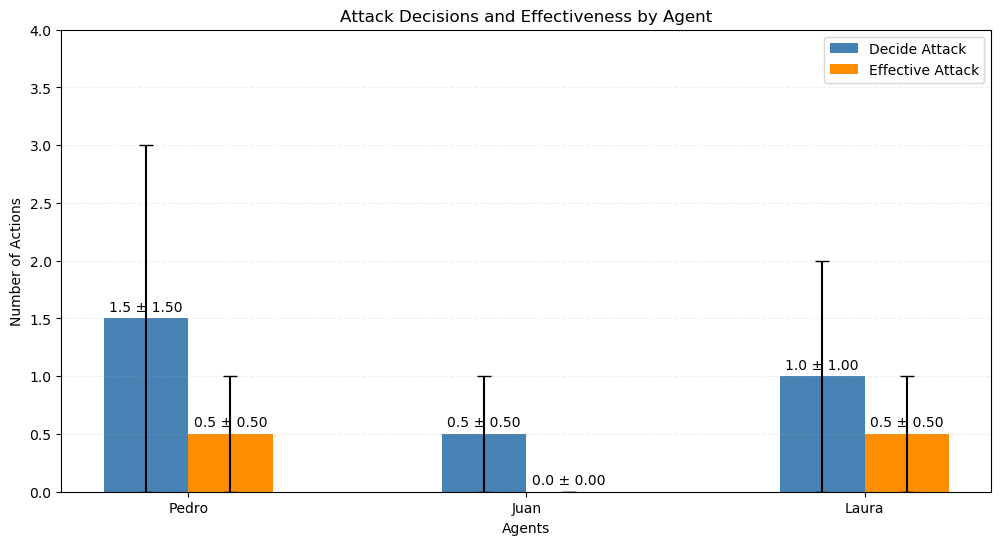

In [114]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

def load_and_process_data(json_file_path):
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    return data

def aggregate_attack_data(experiment_folder):
    experiment_path = os.path.join("../logs", experiment_folder)
    simulations_folders = [name for name in os.listdir(experiment_path) if name != "charts" and os.path.isdir(os.path.join(experiment_path, name))]
    
    all_decisions = {}
    all_effectiveness = {}
    for simulation in simulations_folders:
        json_file_path = os.path.join(experiment_path, simulation, "custom_indicators.json")
        experiment_data = load_and_process_data(json_file_path)
        times_decide_to_attack = experiment_data["times_decide_to_attack"]
        effective_attack = experiment_data["effective_attack"]
        
        for agent in times_decide_to_attack:
            if agent not in all_decisions:
                all_decisions[agent] = []
            all_decisions[agent].append(times_decide_to_attack[agent])
            
            if agent not in all_effectiveness:
                all_effectiveness[agent] = []
            all_effectiveness[agent].append(effective_attack[agent])
    
    return all_decisions, all_effectiveness

def plot_attack_decisions_and_effectiveness(all_decisions, all_effectiveness):
    agents = list(all_decisions.keys())
    decisions_means = [np.mean(all_decisions[agent]) for agent in agents]
    decisions_stds = [np.std(all_decisions[agent]) for agent in agents]
    effectiveness_means = [np.mean(all_effectiveness[agent]) for agent in agents]
    effectiveness_stds = [np.std(all_effectiveness[agent]) for agent in agents]

    fig, ax = plt.subplots(figsize=(12, 6))
    x = np.arange(len(agents))
    width = 0.25

    rects1 = ax.bar(x - width/2, decisions_means, width, yerr=decisions_stds, label='Decide Attack', color="#4682b4", capsize=5)
    rects2 = ax.bar(x + width/2, effectiveness_means, width, yerr=effectiveness_stds, label='Effective Attack', color="#ff8d01", capsize=5)

    ax.set_xlabel('Agents')
    ax.set_ylabel('Number of Actions')
    ax.set_ylim(0, max(decisions_means + effectiveness_means) + 1 + max(decisions_stds + effectiveness_stds))
    ax.set_title('Attack Decisions and Effectiveness by Agent')
    ax.set_xticks(x)
    ax.set_xticklabels(agents)
    ax.grid(axis='y', linestyle='--', alpha=0.2)
    ax.legend()

    
    def autolabel(rects, stds):
        for rect, std in zip(rects, stds):
            height = rect.get_height()
            ax.annotate(f'{height} ± {std:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')
    autolabel(rects1, decisions_stds)
    autolabel(rects2, effectiveness_stds)
    plt.savefig(f'{charts_folder_path}/attack_effectiveness_bar.png', dpi=300)
    plt.show()


# Uso de la función
all_decisions, all_effectiveness = aggregate_attack_data(experiment_folder)
plot_attack_decisions_and_effectiveness(all_decisions, all_effectiveness)


## Attack Effectiveness Pie

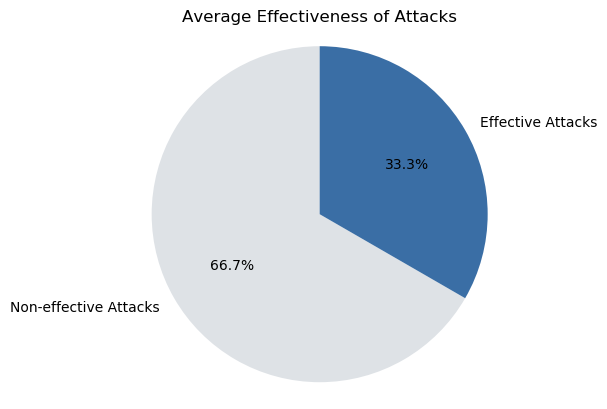

In [115]:
# Calculando la efectividad promedio
total_decisions = sum(sum(np.array([all_decisions[decision] for decision in all_decisions])))

total_effective = sum(sum(np.array([all_effectiveness[decision] for decision in all_effectiveness])))


# Porcentajes para el gráfico de torta
attack_ratios = [total_effective, total_decisions - total_effective][::-1]

# Etiquetas para el gráfico de torta
labels = ['Effective Attacks', 'Non-effective Attacks'][::-1]

# Colores para las secciones del gráfico
colors = ["#3a6ea5", "#dee2e6"][::-1]

# Creación del gráfico de torta
fig1, ax1 = plt.subplots()
ax1.pie(attack_ratios, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Igualar aspecto para que se dibuje como un círculo
ax1.axis('equal')  

# Título del gráfico
plt.title('Average Effectiveness of Attacks')

# Mostrar el gráfico
plt.savefig(f'{charts_folder_path}/attack_effectiveness_pie.png', dpi=300)
plt.show()